In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# import proplot as plot
import cmocean
import datetime
import pandas as pd
import gsw
import seawater as sw


from pycurrents.adcp.rdiraw import Multiread
from Utils import *

In [2]:
ls atomic_eurec4a_2020-ADCP_LTA/

sd-1026/ sd-1060/ sd-1061/


In [3]:
SD = ['26','60','61']

In [4]:
for sd in ['26','60','61']:

    datapath='atomic_eurec4a_2020-ADCP_LTA/sd-10'+sd+'/LTA/*.LTA'
    m=Multiread(datapath,'wh')
    exec('sd'+sd+'=m.read()')

In [5]:
for sd in SD:
    exec('time'+sd+', lon'+sd+', lat'+sd+' = GetEarthCoordinates(sd'+sd+')')


In [6]:
for sd in SD:
    exec('u'+sd+',v'+sd+',w'+sd+',e'+sd+' = GetVelocity(sd'+sd+')')

In [7]:
depth = sd26['dep']
len(depth)

50

In [8]:
def yearday2datetime(yearday,year=2020):
    """Convert day of year to datetime
    
       Input: yearday, year
       yearday is an array 
       Here, year is defaulted to 2020
       
       Returns: datetime.datetime list with 
           -year
           -month
           -day
           -hour
           -minute
           -second
    """
    d = int(yearday)

    if d <= 31:                   # Here, we create conditions that specify what the values of month, day, and jd 
        month = 1                 # should be given a yearday value. These conditions could be repeated to account for 
        day = d                   # the whole year.
        jd = 0
    elif (d>31)&(d<=31+29):
        month = 2
        day = d-31
        jd = 31
    elif (d>31+29)&(d<=31+29+31):
        month = 3
        day = d-31-29
        jd = 31+29

    h = (yearday-day-jd)*24       # Calculate hour, minute, and second given yearday, day, and jd
    hour = int(h)
    m = ((h-hour)*60)
    minute = int(m)
    s = ((m-minute)*60)
    second = int(s)

    return datetime.datetime(year,month,day,hour,minute,second)

In [9]:
a = []
a.append(3)
a.append(4)
a

[3, 4]

In [10]:
def ConvertTime(yearday,year=2020):
    """
        Converts yearday to datetime using the yearday2datetime function 
        Input: yearday, year
        yearday is an array
        year is defaulted to 2020
        
        Returns: an array of datetime.datetime values including: 
           -year
           -month
           -day
           -hour
           -minute
           -second
    """
    
    date_time = [yearday2datetime(yearday[i]) for i in range(len(yearday))] 
    
#     An alternative method for writing the above:

#     date_time = []
#     for i in range(len(yearday)):
#         date_time.append(yearday2datetime(yearday[i]))
            
    return np.array(date_time)

In [11]:
def ConvertTime2(yearday,year=2020):
    """
        Converts yearday to datetime using datetime.timedelta function 
        Input: yearday, year
        yearday is an array
        year is defaulted to 2020
        
        Returns: an array of datetime.datetime values including:
           -year
           -month
           -day
           -hour
           -minute
           -second
    """
    
    
    date_time0 = datetime.datetime(year,1,1)              # Set startup time (year,month,day)
   
    date_time = [date_time0+datetime.timedelta(days=yearday[i]-1) for i in range(len(yearday))]
    
#   Alternatively, one could write: 

#     date_time0 = datetime.datetime(year,1,1)
#     date_time = []
#     for i in range(len(yearday)):
        
#         date_time.append(date_time0+datetime.timedelta(days=yearday[i]-1))

    
    return date_time

In [12]:
date_time0 = datetime.datetime(2020,1,1)
date_time = date_time0+datetime.timedelta(days=time26[5000]-1)
date_time

datetime.datetime(2020, 2, 2, 11, 25, 0, 334000)

In [13]:
for sd in SD:
    exec('date_time'+sd+'= ConvertTime2(time'+sd+')')
    

In [ ]:
def MakeDataset()

velocitydata = xr.Dataset(data_vars={'u':(('time','depth'),u26),
                                       'v':(('time','depth'),v26),
                                        'w':(('time','depth'),w26),
                                        'e':(('time','depth'),e26),
                                       },
                            coords={'time':date_time26,'depth':depth,'latitude':lat26,'longitude':lon26})

return velocitydata+sd+

In [14]:
def RoundTime(date_time):
    """Round time in datetime format to nearest minute 
        Input: date_time
        date_time is an array in datetime format 
        
        Return: date_time rounded to nearest minute 
    """
    # get timedelta
    td = datetime.timedelta(hours=date_time.hour, minutes=date_time.minute, 
                            seconds=date_time.second, microseconds=date_time.microsecond)
    # round timedelta to minute
    to_min = datetime.timedelta(minutes=round(td.total_seconds() / 60))
    
    # convert back to datetime
    date_time = datetime.datetime.combine(date_time, datetime.time(0)) + to_min
    
    return date_time


In [15]:
def RoundDateTimeArray(date_time):
    """Rounds date_time to nearest minute for an entire array 
        Input: date_time
        date_time is an array
        
        Return: date_time array rounded to nearest minute 
        
    """
    
    date_time = [RoundTime(date_time[i]) for i in range(len(date_time))]
    
    return date_time

In [16]:
rdate_time26 = RoundDateTimeArray(date_time26)
rdate_time60 = RoundDateTimeArray(date_time60)
rdate_time61 = RoundDateTimeArray(date_time61)

In [17]:
velocitydata26 = xr.Dataset(data_vars={'u':(('time','depth'),u26),
                                       'v':(('time','depth'),v26),
                                        'w':(('time','depth'),w26),
                                        'e':(('time','depth'),e26),
                                       'latitude':(('time'),lat26),
                                       'longitude':(('time'),lon26)
                                       },
                            coords={'time':rdate_time26,'depth':depth})

velocitydata26 = velocitydata26.expand_dims({'saildrone':['1026']})

velocitydata60 = xr.Dataset(data_vars={'u':(('time','depth'),u60),
                                       'v':(('time','depth'),v60),
                                        'w':(('time','depth'),w60),
                                        'e':(('time','depth'),e60),
                                       'latitude':(('time'),lat60),
                                       'longitude':(('time'),lon60)
                                       },
                            coords={'time':rdate_time60,'depth':depth})

velocitydata60 = velocitydata60.expand_dims({'saildrone':['1060']})

velocitydata61 = xr.Dataset(data_vars={'u':(('time','depth'),u61),
                                       'v':(('time','depth'),v61),
                                        'w':(('time','depth'),w61),
                                        'e':(('time','depth'),e61),
                                       'latitude':(('time'),lat61),
                                       'longitude':(('time'),lon61)
                                       },
                            coords={'time':rdate_time61,'depth':depth})

velocitydata61 = velocitydata61.expand_dims({'saildrone':['1061']})

In [18]:
velocitydata_all = xr.merge([velocitydata26,velocitydata60,velocitydata61])

In [19]:
velocitydata_all

<xarray.Dataset>
Dimensions:    (depth: 50, saildrone: 3, time: 13703)
Coordinates:
  * saildrone  (saildrone) object '1026' '1060' '1061'
  * time       (time) datetime64[ns] 2020-01-11 ... 2020-03-10T01:55:00
  * depth      (depth) float64 4.24 6.24 8.24 10.24 ... 96.24 98.24 100.2 102.2
Data variables:
    u          (saildrone, time, depth) float64 nan nan nan ... -0.009 0.12
    v          (saildrone, time, depth) float64 nan nan nan ... 0.037 -0.063
    w          (saildrone, time, depth) float64 nan nan nan ... 0.138 0.03
    e          (saildrone, time, depth) float64 nan nan nan ... 0.003 -0.012
    latitude   (saildrone, time) float64 nan nan nan nan ... 12.99 12.99 12.99
    longitude  (saildrone, time) float64 nan nan nan ... -59.47 -59.47 -59.47

In [20]:
min_lon = -57.75
min_lat = 10
max_lon = -57.25
max_lat = 10.2

mask_lon = (velocitydata_all.longitude >= min_lon) & (velocitydata_all.longitude <= max_lon)
mask_lat = (velocitydata_all.latitude >= min_lat) & (velocitydata_all.latitude <= max_lat)

In [21]:
cropped_vd = velocitydata_all.where(mask_lon & mask_lat, drop=True)

In [22]:
def CropByLatLon(min_lon,max_lon,min_lat,max_lat,dataset=velocitydata_all):
    """Crops a dataset by specifying a lat and lon range
        Inputs: min_lon = minimum longitude
                max_lon = maximun longitude
                min_lat = minimum latitude
                max_lat = maximun latitude 
                dataset is defaulted to velocitydata_all (but this can be changed)
                
        Return: cropped_ds (the newly cropped dataset)
    """

    mask_lon = (dataset.longitude >= min_lon) & (dataset.longitude <= max_lon)
    mask_lat = (dataset.latitude >= min_lat) & (dataset.latitude <= max_lat)

    cropped_ds = dataset.where(mask_lon & mask_lat, drop=True)
    
    return cropped_ds

In [23]:
cropped_vd = CropByLatLon(-57.75,-57.25,10,10.2)
cropped_vd

<xarray.Dataset>
Dimensions:    (depth: 50, saildrone: 3, time: 91)
Coordinates:
  * saildrone  (saildrone) object '1026' '1060' '1061'
  * time       (time) datetime64[ns] 2020-02-15T19:45:00 ... 2020-02-16T03:15:00
  * depth      (depth) float64 4.24 6.24 8.24 10.24 ... 96.24 98.24 100.2 102.2
Data variables:
    u          (saildrone, time, depth) float64 nan nan nan nan ... nan nan nan
    v          (saildrone, time, depth) float64 nan nan nan nan ... nan nan nan
    w          (saildrone, time, depth) float64 nan nan nan nan ... nan nan nan
    e          (saildrone, time, depth) float64 nan nan nan nan ... nan nan nan
    latitude   (saildrone, time) float64 nan nan nan 10.2 ... nan nan nan nan
    longitude  (saildrone, time) float64 nan nan nan -57.43 ... nan nan nan nan

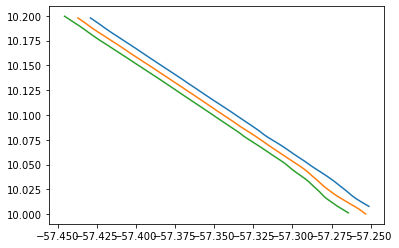

In [24]:
plt.plot(cropped_vd.sel(saildrone='1026').longitude,cropped_vd.sel(saildrone='1026').latitude)
plt.plot(cropped_vd.sel(saildrone='1060').longitude,cropped_vd.sel(saildrone='1060').latitude)
plt.plot(cropped_vd.sel(saildrone='1061').longitude,cropped_vd.sel(saildrone='1061').latitude)

In [25]:
def GetTimeWindow(i,dataset=velocitydata_all):
    """Select data within +/- 15 min window centered at a particular observation (i)
        Input: i = nth observation
                dataset defaulted to velocitydata_all
        Return: subset (new dataset with 30 min interval)
    """

# select data within +/- 15min window centered at time[i]
    dt = np.abs(dataset.time-dataset.isel(time=i).time)   # absolute time difference
    subset = dataset.where(dt<=np.timedelta64(15,'m'),drop=True)
    
    return subset 

In [26]:
# select data within +/- 15min window centered at time[i]
i = 9000
dt = np.abs(velocitydata_all.time-velocitydata_all.isel(time=i).time)   # absolute time difference
subset = velocitydata_all.where(dt<=np.timedelta64(15,'m'),drop=True)

In [27]:
subset = GetTimeWindow(9000)

In [28]:
subset

<xarray.Dataset>
Dimensions:    (depth: 50, saildrone: 3, time: 7)
Coordinates:
  * saildrone  (saildrone) object '1026' '1060' '1061'
  * time       (time) datetime64[ns] 2020-02-15T04:30:00 ... 2020-02-15T05:00:00
  * depth      (depth) float64 4.24 6.24 8.24 10.24 ... 96.24 98.24 100.2 102.2
Data variables:
    u          (saildrone, time, depth) float64 0.253 0.252 0.257 ... nan nan
    v          (saildrone, time, depth) float64 -0.306 -0.288 -0.288 ... nan nan
    w          (saildrone, time, depth) float64 -0.036 -0.042 -0.044 ... nan nan
    e          (saildrone, time, depth) float64 0.003 -0.012 0.0 ... nan nan nan
    latitude   (saildrone, time) float64 10.79 10.78 10.78 ... 10.77 10.76 10.76
    longitude  (saildrone, time) float64 -57.99 -57.98 -57.98 ... -57.98 -57.98

In [29]:
mean_lon = np.mean(subset.longitude)
mean_lat = np.mean(subset.latitude)
central_point = (mean_lon,mean_lat)

In [30]:
central_point

(<xarray.DataArray 'longitude' ()>
 array(-57.98213464),
 <xarray.DataArray 'latitude' ()>
 array(10.77195685))

In [31]:
def getImage(path):
    return OffsetImage(plt.imread(path))

In [32]:
for i in range(20,subset.time.size-20,1):
    subsubset = subset.isel(time=i)
    title = str(subsubset.time.values)[:16]
    fig = plt.figure(figsize=(6.5,6.5))
    ax = fig.add_subplot(111)
    for drone in ['1026','1060','1061']:
        lonc, latc = subsubset.longitude.mean(), subsubset.latitude.mean()
        theta = latc*np.pi/180
        x = 111*(subset.sel(saildrone=drone).longitude-lonc)*np.cos(theta)
        y = 111*(subset.sel(saildrone=drone).latitude-latc)
        plt.plot(x[i-20:i+20],y[i-20:i+20])
        x0, y0 = x[i],y[i]
        ax.scatter(x0, y0,s=0.001) 
        if subset.sel(saildrone=drone).longitude[i]>subset.sel(saildrone=drone).longitude[i-1]:
            ab = AnnotationBbox(getImage('sdsmall.png'), (x0, y0), frameon=False)
        else:
            ab = AnnotationBbox(getImage('sdsmall_left.png'), (x0, y0), frameon=False)
        ax.add_artist(ab)   
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.xlabel('x [km]')
    plt.ylabel('y [km]')
    plt.title(title)
    plt.savefig('figs2movie/'+title+'.png',bbox_inches='tight',dpi=80)
    plt.close('all')

In [33]:
fig = plt.figure(figsize=(6.5,6.5))
ax = fig.add_subplot(111)

plt.plot(subset.sel(saildrone='1026').longitude,subset.sel(saildrone='1026').latitude,label='1026')
plt.plot(subset.sel(saildrone='1060').longitude,subset.sel(saildrone='1060').latitude,label='1060')
plt.plot(subset.sel(saildrone='1061').longitude,subset.sel(saildrone='1061').latitude,label='1061')
plt.plot(mean_lon,mean_lat,"*")
plt.legend(title='Saildrone')
subset.isel(time=3).plot.scatter(x='longitude',y='latitude')
x0, y0 = subset.isel(time=3).longitude,subset.isel(time=3).latitude
plt.scatter(x0, y0) 
ab = AnnotationBbox(getImage('sdsmall.png'), (x0, y0), frameon=False)
ax.add_artist(ab)

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 468x468 with 1 Axes>

TypeError: only size-1 arrays can be converted to Python scalars

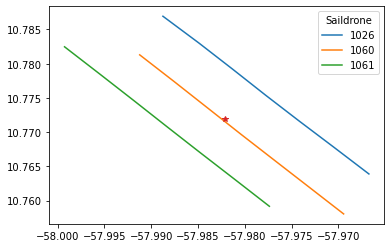

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 468x468 with 1 Axes>

In [34]:
# plt.plot(subset.sel(saildrone='1026').longitude,subset.sel(saildrone='1026').latitude,label='1026')
# plt.plot(subset.sel(saildrone='1060').longitude,subset.sel(saildrone='1060').latitude,label='1060')
# plt.plot(subset.sel(saildrone='1061').longitude,subset.sel(saildrone='1061').latitude,label='1061')
# plt.plot(mean_lon,mean_lat,"*")
# plt.legend(title='Saildrone')

for i in range(len(subset.time)): 
    plt.plot(subset.sel(saildrone='1026').longitude,subset.sel(saildrone='1026').latitude,label='1026')
    plt.plot(subset.sel(saildrone='1060').longitude,subset.sel(saildrone='1060').latitude,label='1060')
    plt.plot(subset.sel(saildrone='1061').longitude,subset.sel(saildrone='1061').latitude,label='1061')
    plt.plot(mean_lon,mean_lat,"*")
    plt.legend(title='Saildrone')
    
    #subset.isel(time=i).plot.scatter(x='longitude',y='latitude')
    fig = plt.figure(figsize=(6.5,6.5))
    ax = fig.add_subplot(111)
    
    x0, y0 = subset.isel(time=i).longitude,subset.isel(time=i).latitude
    plt.scatter(x0, y0) 
    ab = AnnotationBbox(getImage('sdsmall.png'), (x0, y0), frameon=False)
    ax.add_artist(ab)
    title=str(subset.isel(time=i).time.values)[:16]
    plt.title(title)
    plt.savefig('figs2movie/'+title+'.png')
    plt.close('all')

In [44]:
!convert -delay 15 -loop 0 figs2movie/*.png figs2movie/atomic_saildrone.gif

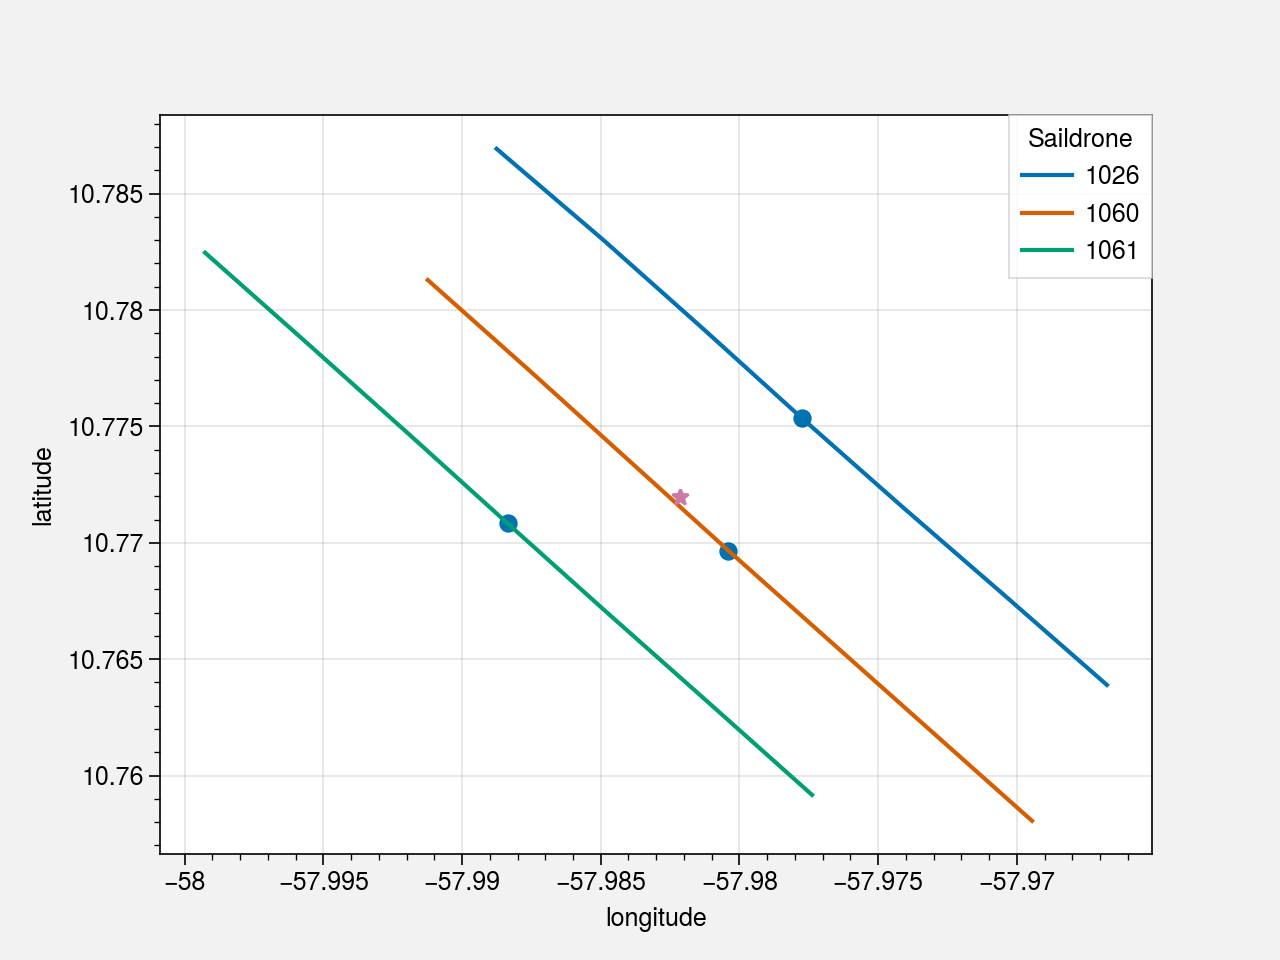

In [187]:
plt.plot(subset.sel(saildrone='1026').longitude,subset.sel(saildrone='1026').latitude,label='1026')
plt.plot(subset.sel(saildrone='1060').longitude,subset.sel(saildrone='1060').latitude,label='1060')
plt.plot(subset.sel(saildrone='1061').longitude,subset.sel(saildrone='1061').latitude,label='1061')
plt.plot(mean_lon,mean_lat,"*")
plt.legend(title='Saildrone')
subset.isel(time=3).plot.scatter(x='longitude',y='latitude')

In [47]:
for i, sd in range(len(subset.time)), SD:
    dist = gsw.distance([subset.sel(saildrone=sd).longitude[i],mean_lon],
             [subset.sel(saildrone=sd).latitude[i],mean_lat])
    print(dist)

ValueError: too many values to unpack (expected 2)

In [147]:
gsw.distance([subset.sel(saildrone='1026').longitude[0],mean_lon],
             [subset.sel(saildrone='1026').latitude[0],mean_lat])


array([1814.59541398])

<ipython-input-35-0a0026e20652>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax3.pcolormesh(subset1.time,subset1.depth,subset1.u.T,**kw)
<ipython-input-35-0a0026e20652>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax4.pcolormesh(subset2.time,subset1.depth,subset2.u.T,**kw)
<ipython-input-35-0a0026e20652>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners o

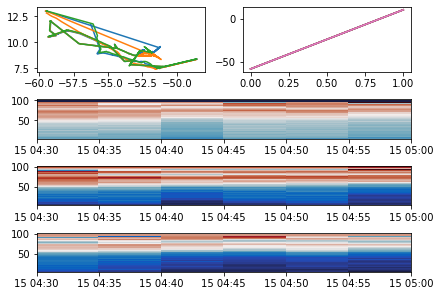

In [35]:
# fig, ax = plt.subplots(nrows=4,ncols=2,gridspec_kw={'height_ratios':[6,3,3,3],
#                                                    'width_ratios':[2,2]})
kw = {'cmap': cmocean.cm.balance}
subset1 = subset.sel(saildrone='1026')
subset2 = subset.sel(saildrone='1060')
subset3 = subset.sel(saildrone='1061')

fig = plt.figure(constrained_layout=True)
spec = fig.add_gridspec(nrows=4,ncols=2,height_ratios=[10,6,6,6], width_ratios=[2,2])

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[1,:])
ax4 = fig.add_subplot(spec[2,:])
ax5 = fig.add_subplot(spec[3,:])

ax1.plot(velocitydata_all.sel(saildrone='1026').longitude,velocitydata_all.sel(saildrone='1026').latitude)
ax1.plot(velocitydata_all.sel(saildrone='1060').longitude,velocitydata_all.sel(saildrone='1060').latitude)
ax1.plot(velocitydata_all.sel(saildrone='1061').longitude,velocitydata_all.sel(saildrone='1061').latitude)
ax2.plot((subset1.longitude,subset1.latitude))
# ax2.plot((subset2.longitude,subset2.latitude))
# ax2.plot((subset3.longitude,subset3.latitude))

ax3.pcolormesh(subset1.time,subset1.depth,subset1.u.T,**kw)
ax4.pcolormesh(subset2.time,subset1.depth,subset2.u.T,**kw)
ax5.pcolormesh(subset3.time,subset1.depth,subset3.u.T,**kw)

# cbar_ax = fig.add_axes([0.925, 0.225, 0.015, 0.5])
# plt.colorbar(ax3, cax=cbar_ax,label='Velocity [m/s]')

<ipython-input-51-b130cec8db14>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  f0_ax3.pcolormesh(subset1.time,subset1.depth,subset1.u.T,**kw)
<ipython-input-51-b130cec8db14>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  f0_ax4.pcolormesh(subset2.time,subset1.depth,subset2.u.T,**kw)
<ipython-input-51-b130cec8db14>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the cor

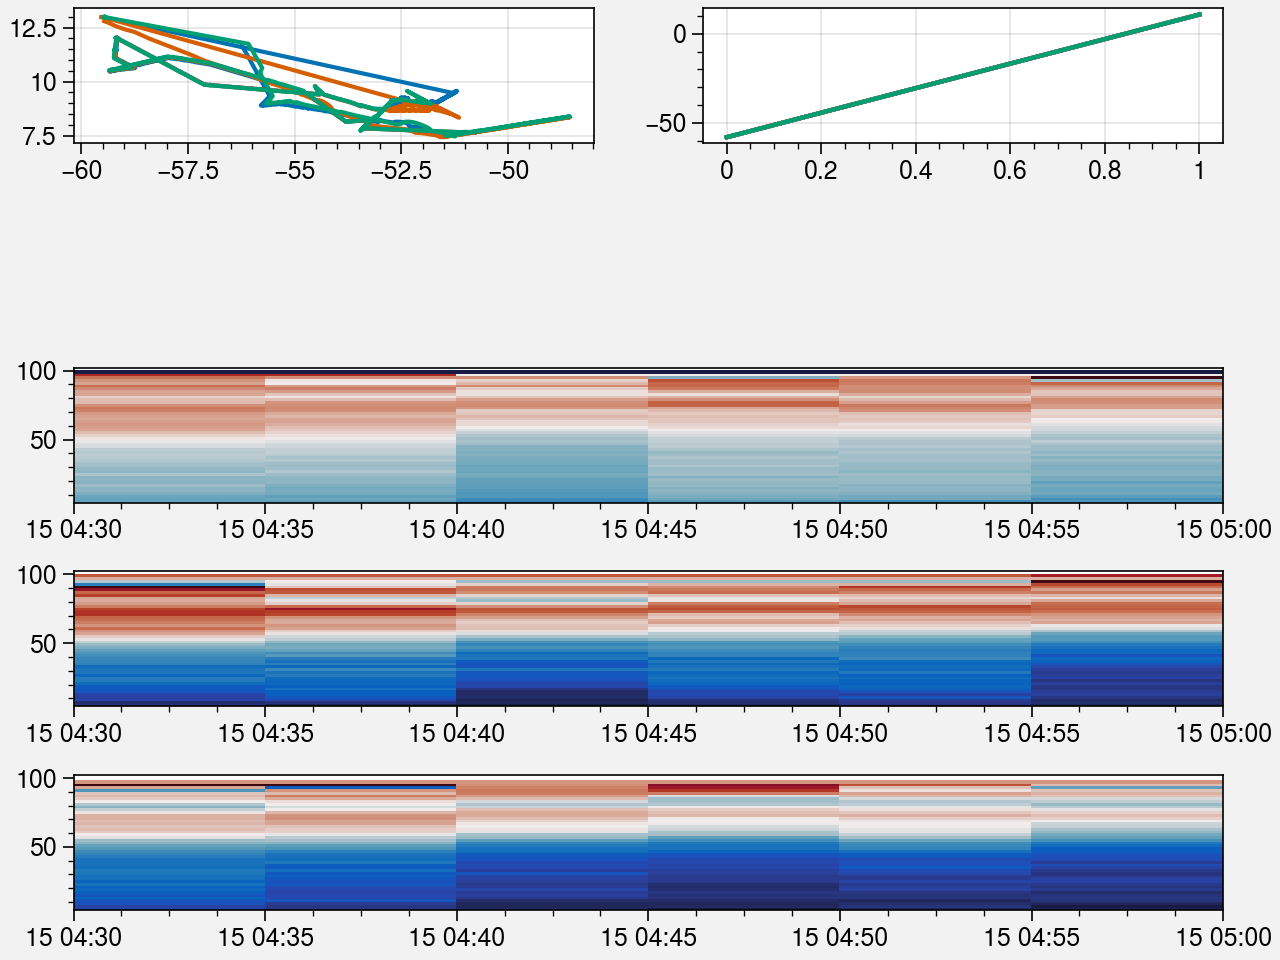

In [51]:
kw = {'cmap': cmocean.cm.balance}
subset1 = subset.sel(saildrone='1026')
subset2 = subset.sel(saildrone='1060')
subset3 = subset.sel(saildrone='1061')

fig0 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=5, figure=fig0)
f0_ax1 = fig0.add_subplot(spec2[0:1, 0])
f0_ax2 = fig0.add_subplot(spec2[0:1, 1])
f0_ax3 = fig0.add_subplot(spec2[2,:])
f0_ax4 = fig0.add_subplot(spec2[3,:])
f0_ax5 = fig0.add_subplot(spec2[4,:])

f0_ax2.plot((subset.sel(saildrone='1026').longitude,subset.sel(saildrone='1026').latitude))
f0_ax2.plot((subset.sel(saildrone='1060').longitude,subset.sel(saildrone='1060').latitude))
f0_ax2.plot((subset.sel(saildrone='1061').longitude,subset.sel(saildrone='1061').latitude))

f0_ax1.plot(velocitydata_all.sel(saildrone='1026').longitude,velocitydata_all.sel(saildrone='1026').latitude)
f0_ax1.plot(velocitydata_all.sel(saildrone='1060').longitude,velocitydata_all.sel(saildrone='1060').latitude)
f0_ax1.plot(velocitydata_all.sel(saildrone='1061').longitude,velocitydata_all.sel(saildrone='1061').latitude)

f0_ax3.pcolormesh(subset1.time,subset1.depth,subset1.u.T,**kw)
f0_ax4.pcolormesh(subset2.time,subset1.depth,subset2.u.T,**kw)
f0_ax5.pcolormesh(subset3.time,subset1.depth,subset3.u.T,**kw)

<ipython-input-185-658c090b7f63>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img0 = axs[0].pcolormesh(subset1.time,subset1.depth,subset1.u.T,**kw)
<ipython-input-185-658c090b7f63>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img1 = axs[1].pcolormesh(subset2.time,subset2.depth,subset2.u.T,**kw)
<ipython-input-185-658c090b7f63>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either

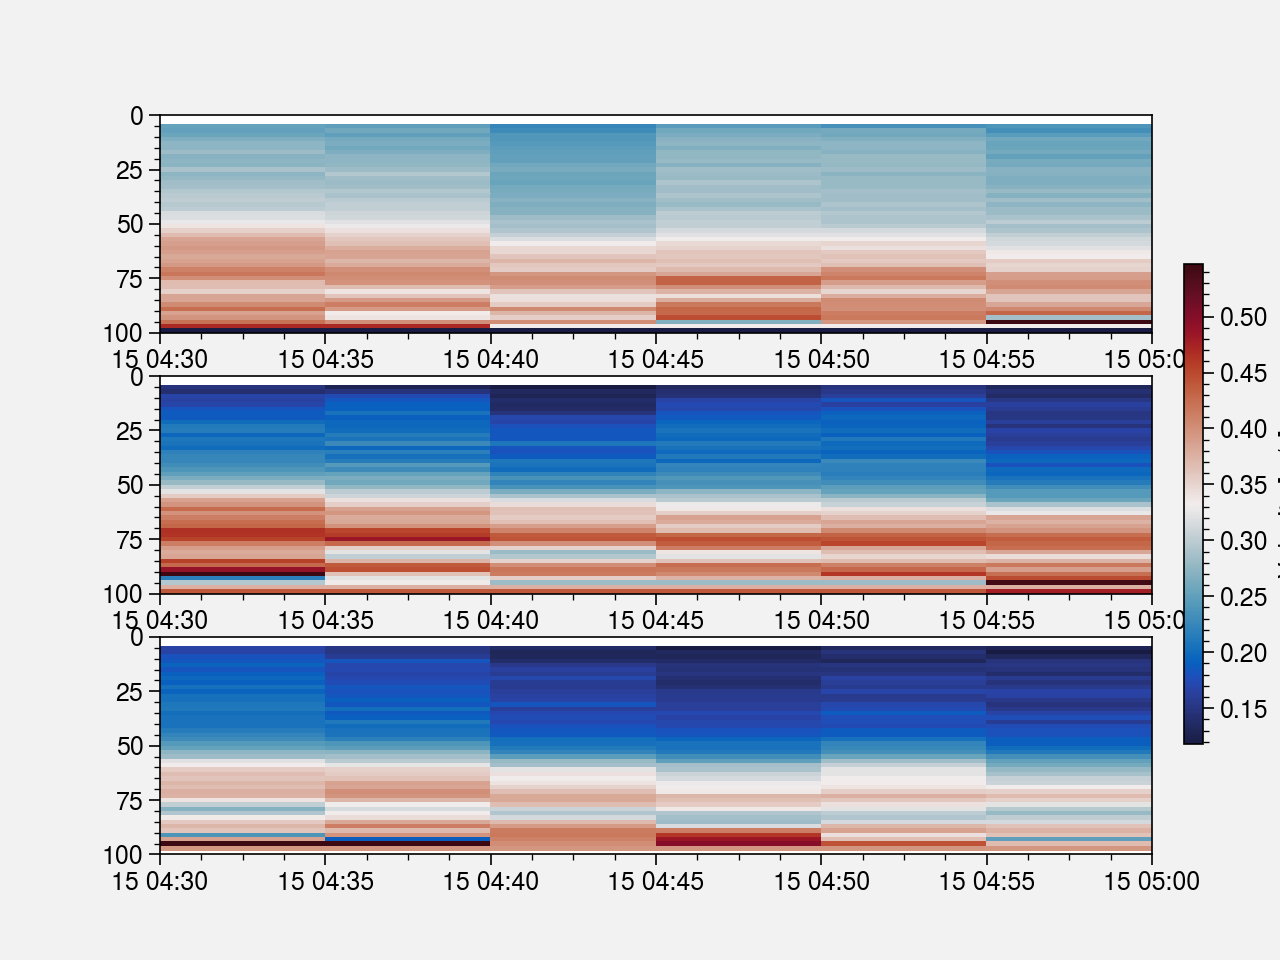

In [185]:
kw = {'cmap': cmocean.cm.balance}
fig, axs = plt.subplots(3,1)
ylim = (100,0)

subset1 = subset.sel(saildrone='1026')
subset2 = subset.sel(saildrone='1060')
subset3 = subset.sel(saildrone='1061')

img0 = axs[0].pcolormesh(subset1.time,subset1.depth,subset1.u.T,**kw)
axs[0].set(ylim=ylim)


img1 = axs[1].pcolormesh(subset2.time,subset2.depth,subset2.u.T,**kw)
axs[1].set(ylim=ylim)


img2 = axs[2].pcolormesh(subset3.time,subset3.depth,subset3.u.T,**kw)
axs[2].set(ylim=ylim)


cbar_ax = fig.add_axes([0.925, 0.225, 0.015, 0.5])
fig.colorbar(img0, cax=cbar_ax,label='Velocity [m/s]')


<ipython-input-151-24bf50196b35>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(subset1.time,subset1.depth,subset1.u.T,**kw)
<ipython-input-151-24bf50196b35>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(subset1.time,subset1.depth,subset1.v.T,**kw)


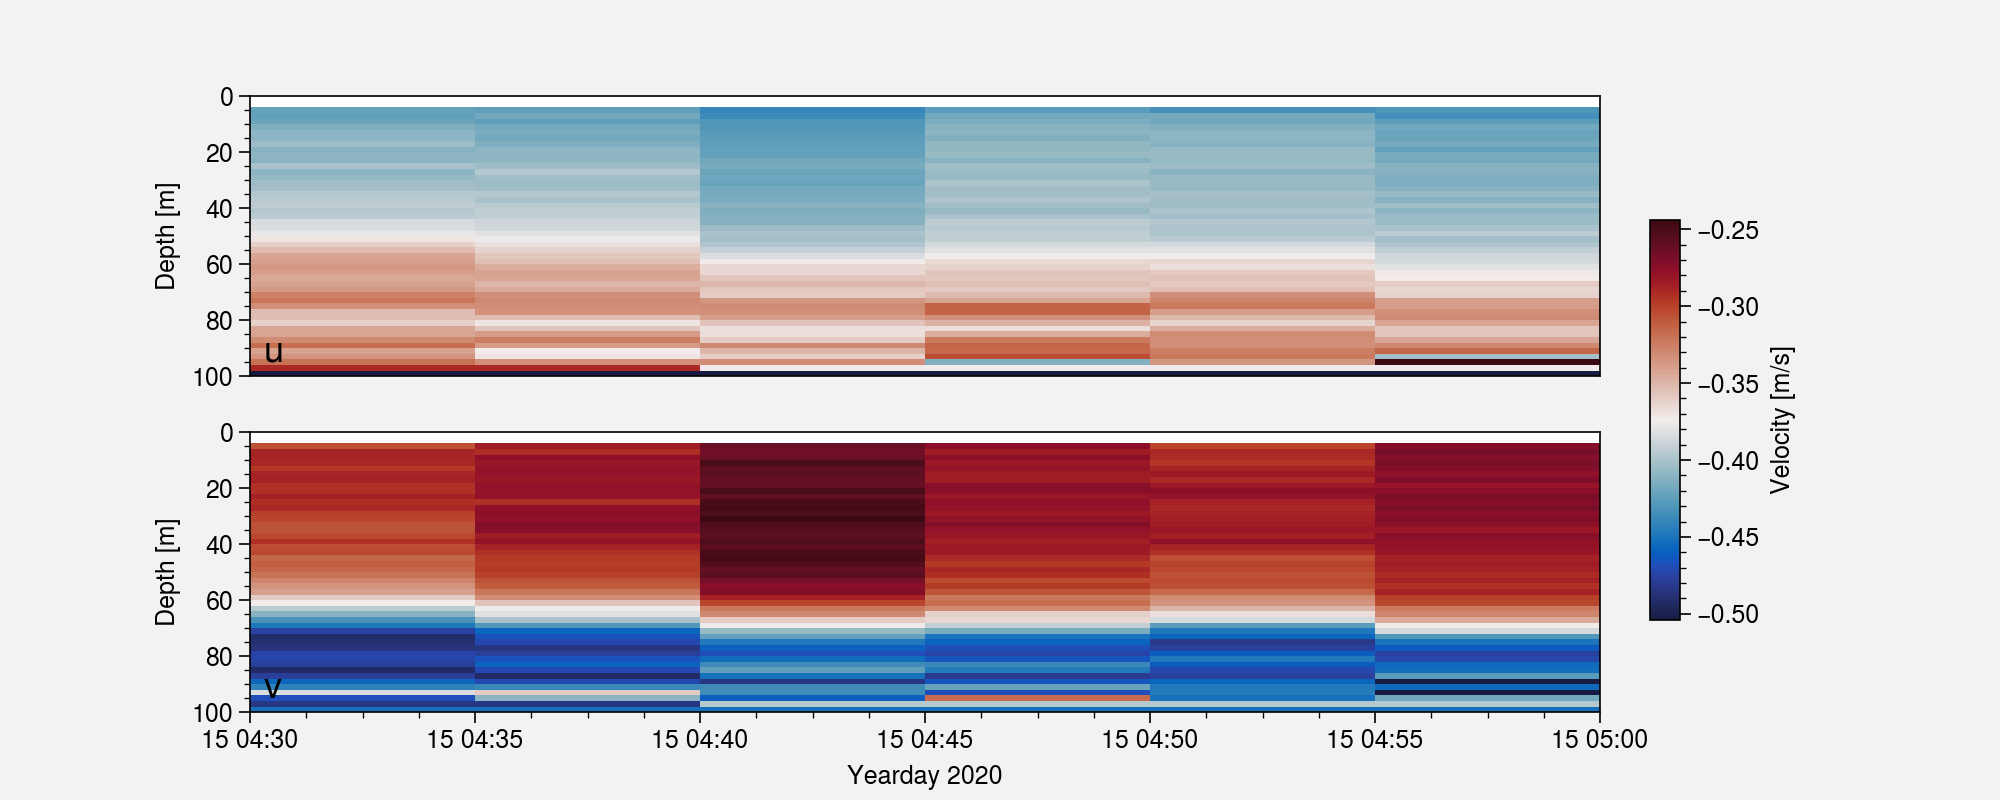

In [151]:
kw = {'cmap': cmocean.cm.balance,
      }

labelpos = (0.01,0.05)
ylim = (100,0)

subset1 = subset.sel(saildrone='1026')

fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(211)
plt.pcolormesh(subset1.time,subset1.depth,subset1.u.T,**kw)
plt.ylim(*ylim)
plt.xticks([])
plt.ylabel('Depth [m]')


ax.text(*labelpos, 'u', fontsize=13,transform=ax.transAxes)


# a dummy colorbar
# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0, 0., 0., 0.])
# fig.colorbar(im, cax=cbar_ax)

ax = fig.add_subplot(212)
im = plt.pcolormesh(subset1.time,subset1.depth,subset1.v.T,**kw)
plt.ylim(*ylim)
plt.ylabel('Depth [m]')
plt.xlabel('Yearday 2020')
# plt.colorbar()

ax.text(*labelpos, 'v', fontsize=13,transform=ax.transAxes)


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.825, 0.225, 0.015, 0.5])
fig.colorbar(im, cax=cbar_ax,label='Velocity [m/s]')

In [152]:
fig.colorbar?

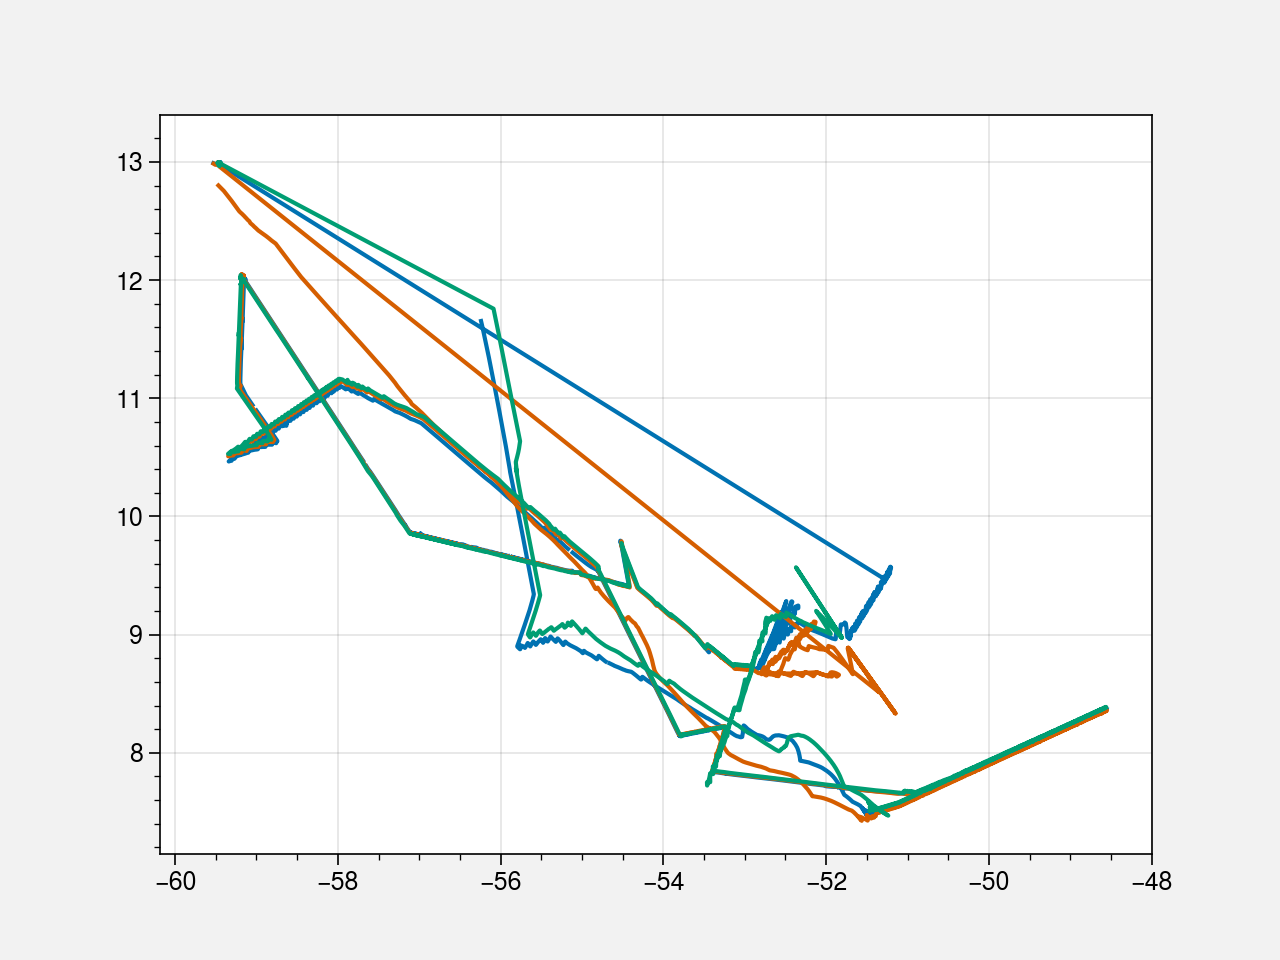

In [77]:
plt.plot(velocitydata_all.sel(saildrone='1026').longitude,velocitydata_all.sel(saildrone='1026').latitude)
plt.plot(velocitydata_all.sel(saildrone='1060').longitude,velocitydata_all.sel(saildrone='1060').latitude)
plt.plot(velocitydata_all.sel(saildrone='1061').longitude,velocitydata_all.sel(saildrone='1061').latitude)

In [56]:
sd1026 = velocitydata_all.sel(saildrone='1026')
sd1026

<xarray.Dataset>
Dimensions:    (depth: 50, time: 13703)
Coordinates:
    saildrone  <U4 '1026'
  * time       (time) datetime64[ns] 2020-01-11 ... 2020-03-10T01:55:00
  * depth      (depth) float64 4.24 6.24 8.24 10.24 ... 96.24 98.24 100.2 102.2
Data variables:
    u          (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    v          (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    w          (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    e          (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    latitude   (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    longitude  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan

(100.0, 0.0)

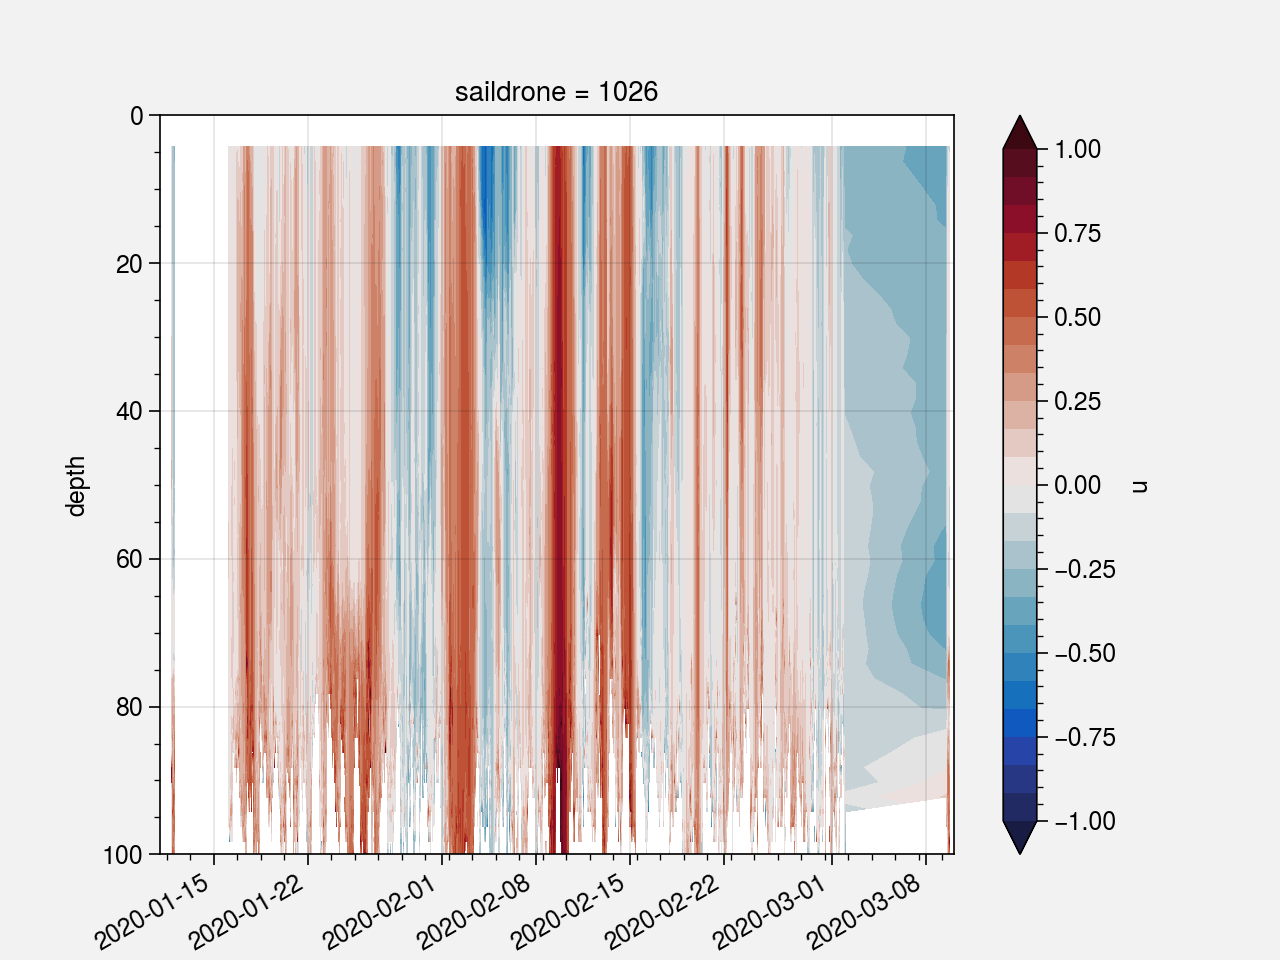

In [23]:
kw = {'cmap': cmocean.cm.balance,
      'levels':np.linspace(-1,1,25)
      }
subset = velocitydata_all.sel(saildrone='1026')
subset.u.plot.contourf(x='time',y='depth',**kw)
plt.ylim(100,0)

<ipython-input-24-c0ece72a0cb9>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(subset.time,subset.depth,subset.u.T,**kw)
<ipython-input-24-c0ece72a0cb9>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(subset.time,subset.depth,subset.v.T,**kw)


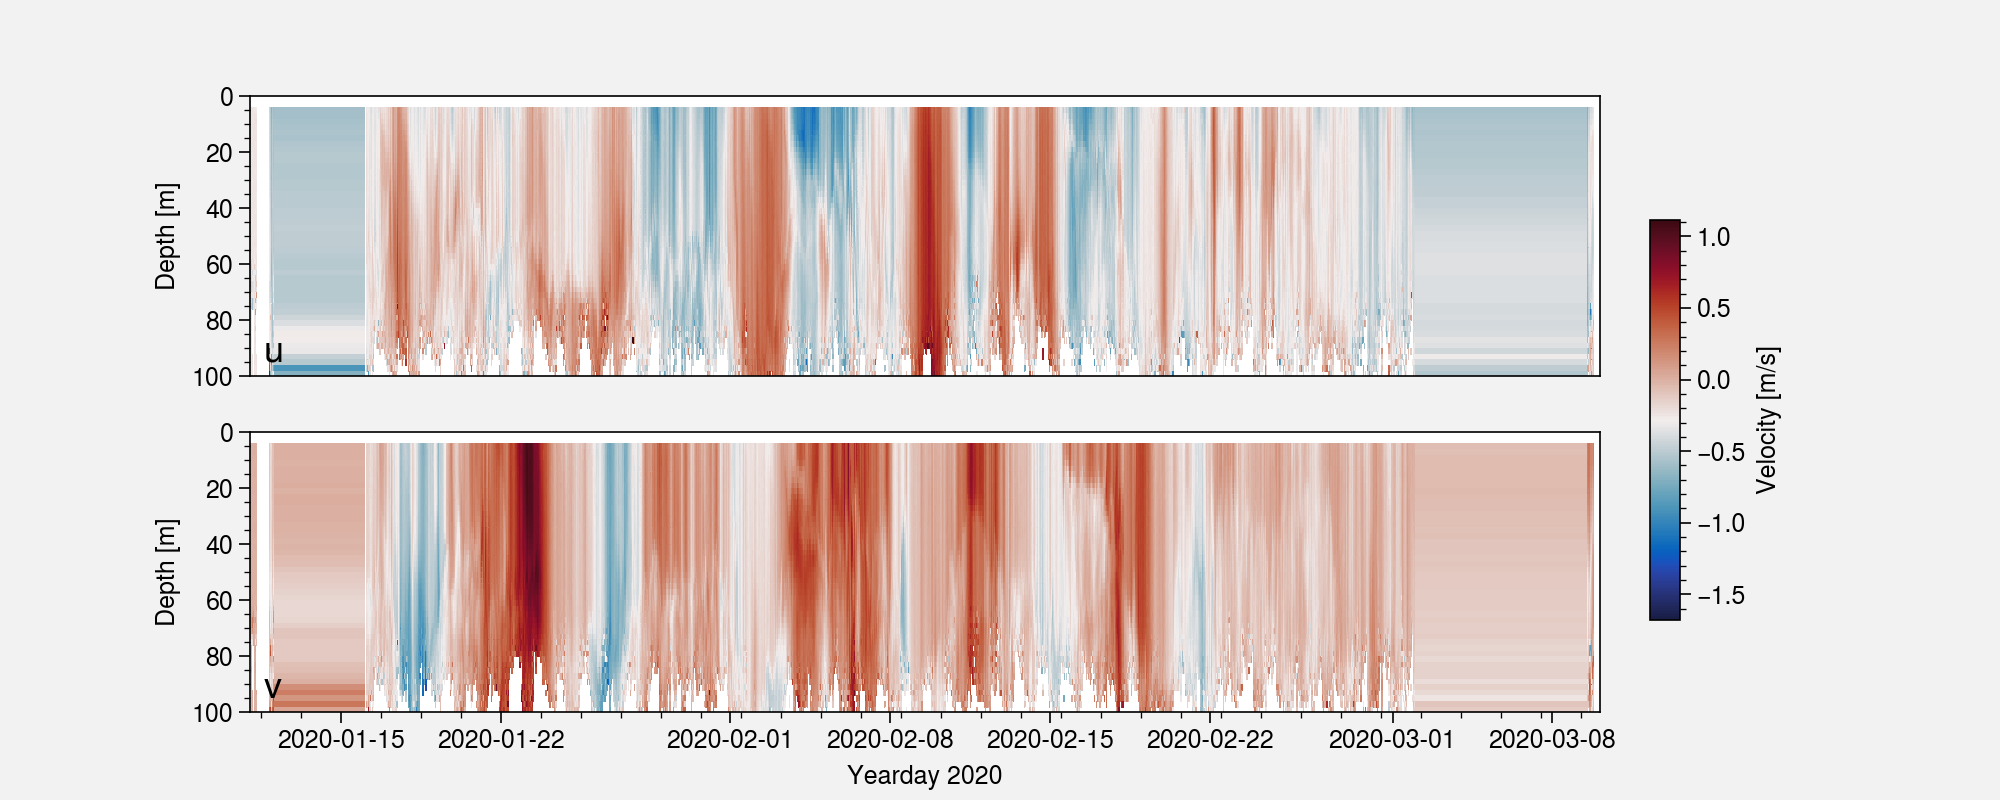

In [24]:
kw = {'cmap': cmocean.cm.balance,
      }

labelpos = (0.01,0.05)
ylim = (100,0)

subset = velocitydata_all.sel(saildrone='1026')

fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(211)
plt.pcolormesh(subset.time,subset.depth,subset.u.T,**kw)
plt.ylim(*ylim)
plt.xticks([])
plt.ylabel('Depth [m]')


ax.text(*labelpos, 'u', fontsize=13,transform=ax.transAxes)


# a dummy colorbar
# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0, 0., 0., 0.])
# fig.colorbar(im, cax=cbar_ax)

ax = fig.add_subplot(212)
im = plt.pcolormesh(subset.time,subset.depth,subset.v.T,**kw)
plt.ylim(*ylim)
plt.ylabel('Depth [m]')
plt.xlabel('Yearday 2020')
# plt.colorbar()

ax.text(*labelpos, 'v', fontsize=13,transform=ax.transAxes)


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.825, 0.225, 0.015, 0.5])
fig.colorbar(im, cax=cbar_ax,label='Velocity [m/s]')

<ipython-input-25-fbdbc6f05229>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img0 = axs[0].pcolormesh(subset.time,subset.depth,subset.u.T,**kw)
<ipython-input-25-fbdbc6f05229>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img1 = axs[1].pcolormesh(subset.time,subset.depth,subset.v.T,**kw)


[(100.0, 0.0)]

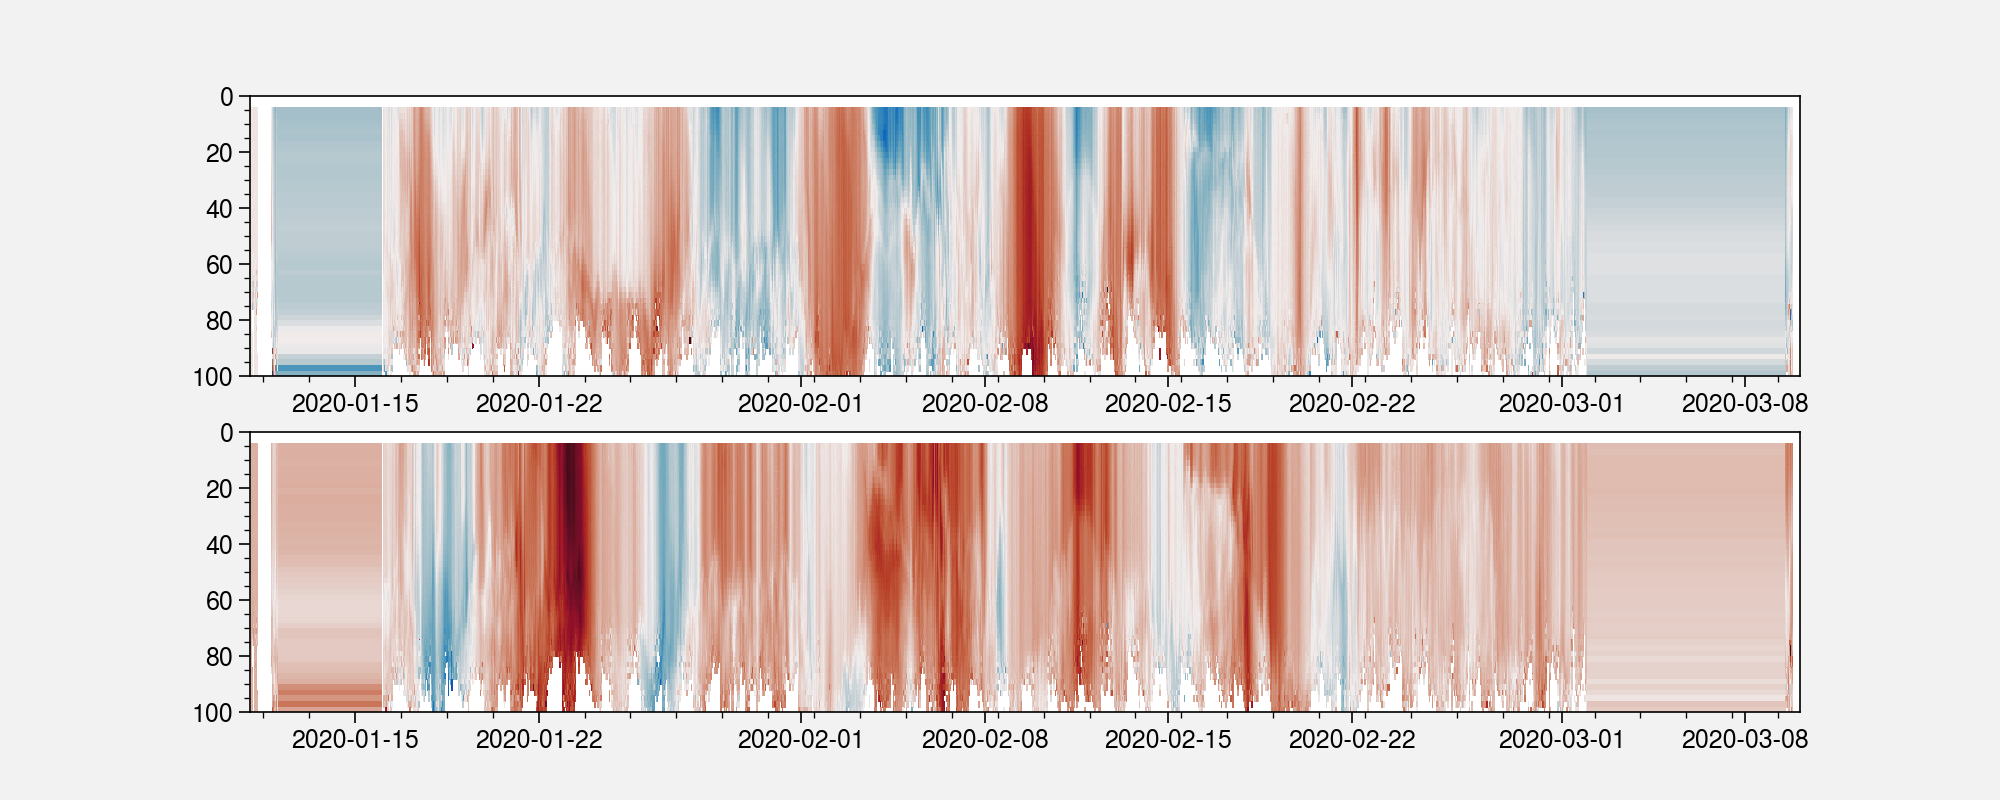

In [25]:
kw = {'cmap': cmocean.cm.balance}
fig, axs = plt.subplots(2,1,figsize=(10,4))
ylim = (100,0)

subset = velocitydata_all.sel(saildrone='1026')

img0 = axs[0].pcolormesh(subset.time,subset.depth,subset.u.T,**kw)
axs[0].set(ylim=ylim)

img1 = axs[1].pcolormesh(subset.time,subset.depth,subset.v.T,**kw)
axs[1].set(ylim=ylim)

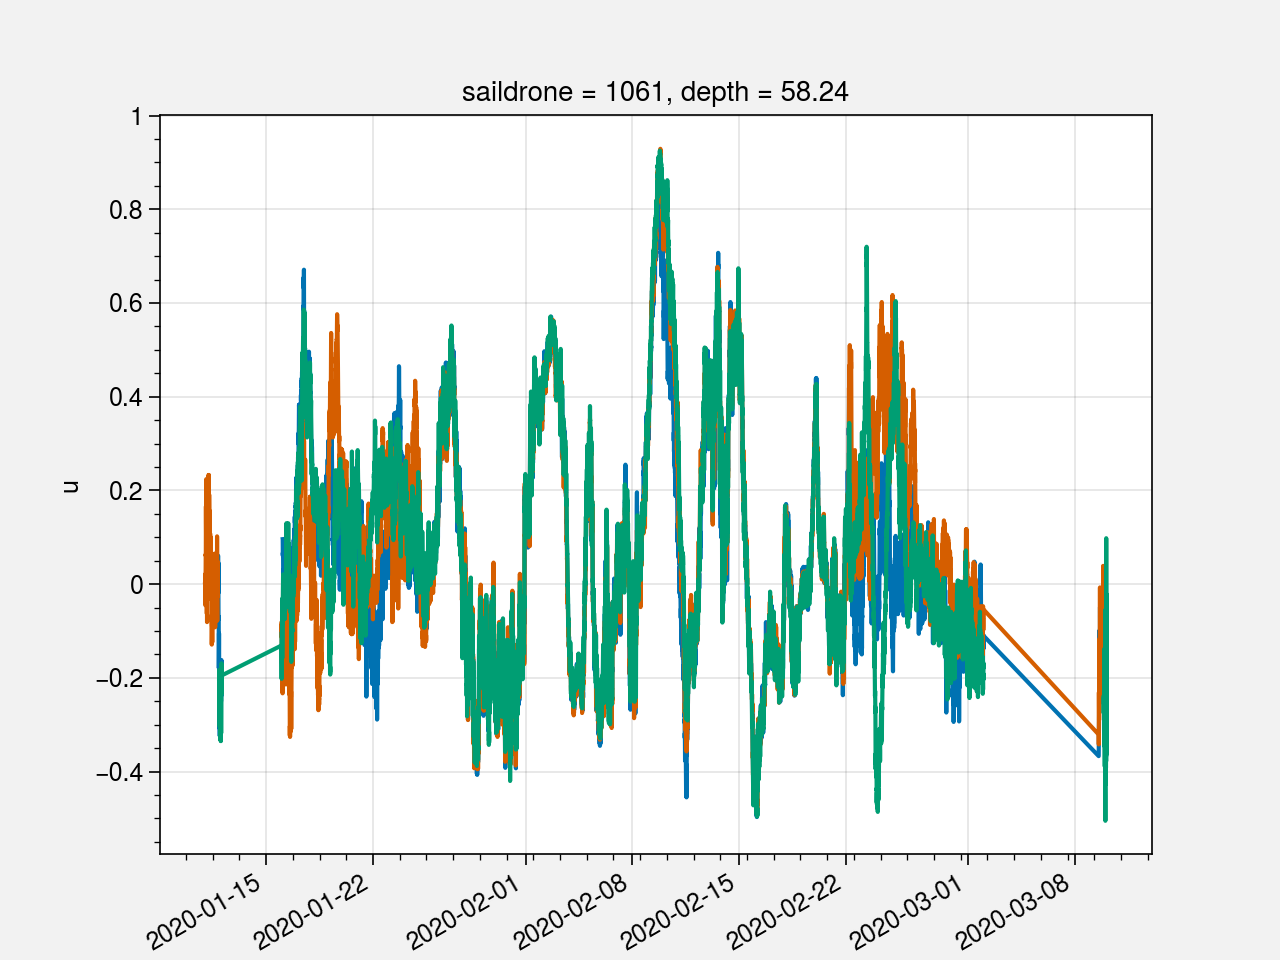

In [26]:
# plt.plot(rdate_time26,u26[:,0])
velocitydata_all.sel(saildrone='1026',depth=58.24).u.plot()
velocitydata_all.sel(saildrone='1060',depth=58.24).u.plot()
velocitydata_all.sel(saildrone='1061',depth=58.24).u.plot()

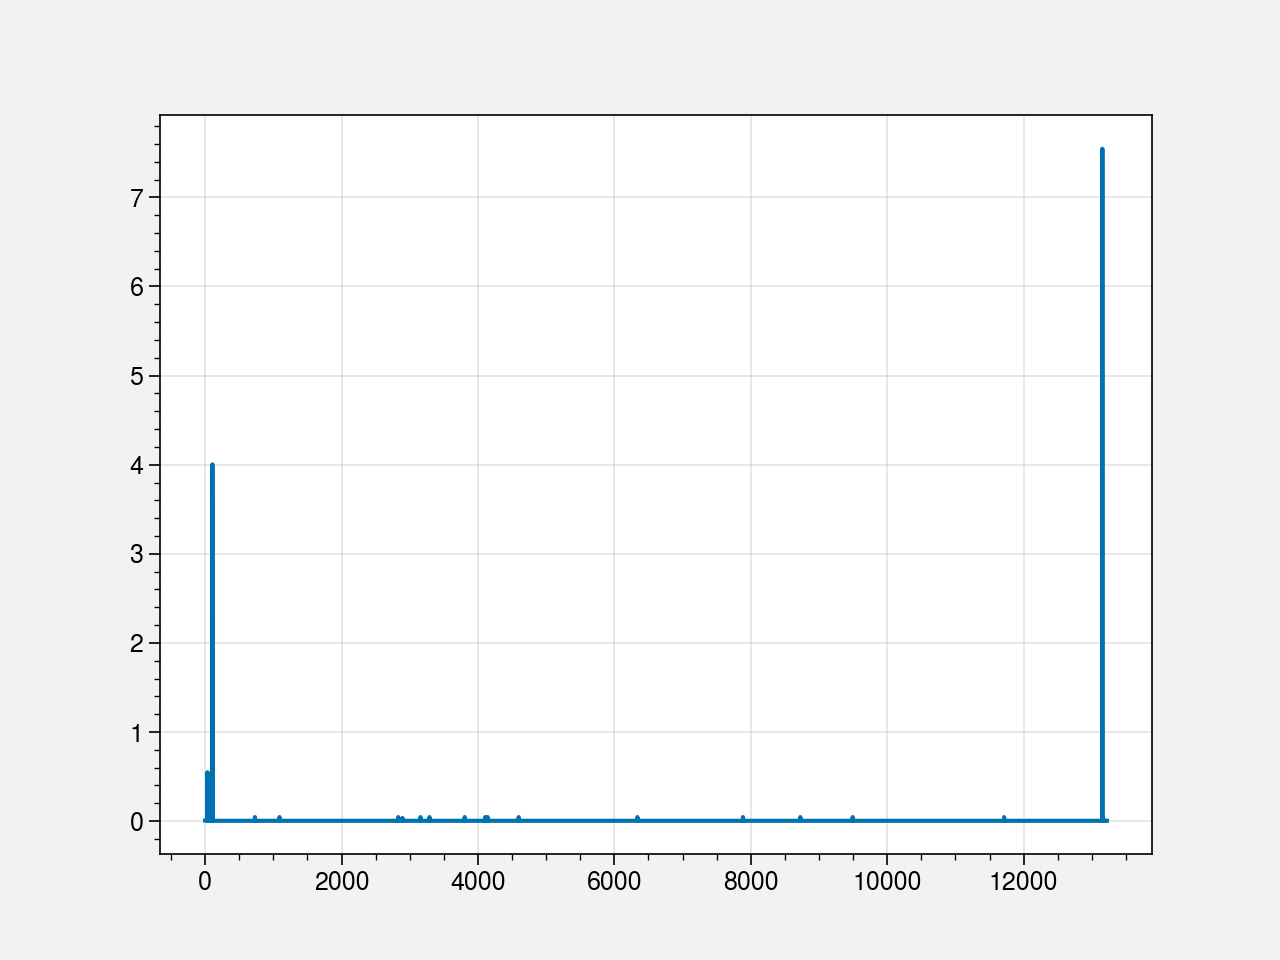

In [77]:
plt.plot(np.diff(time26))

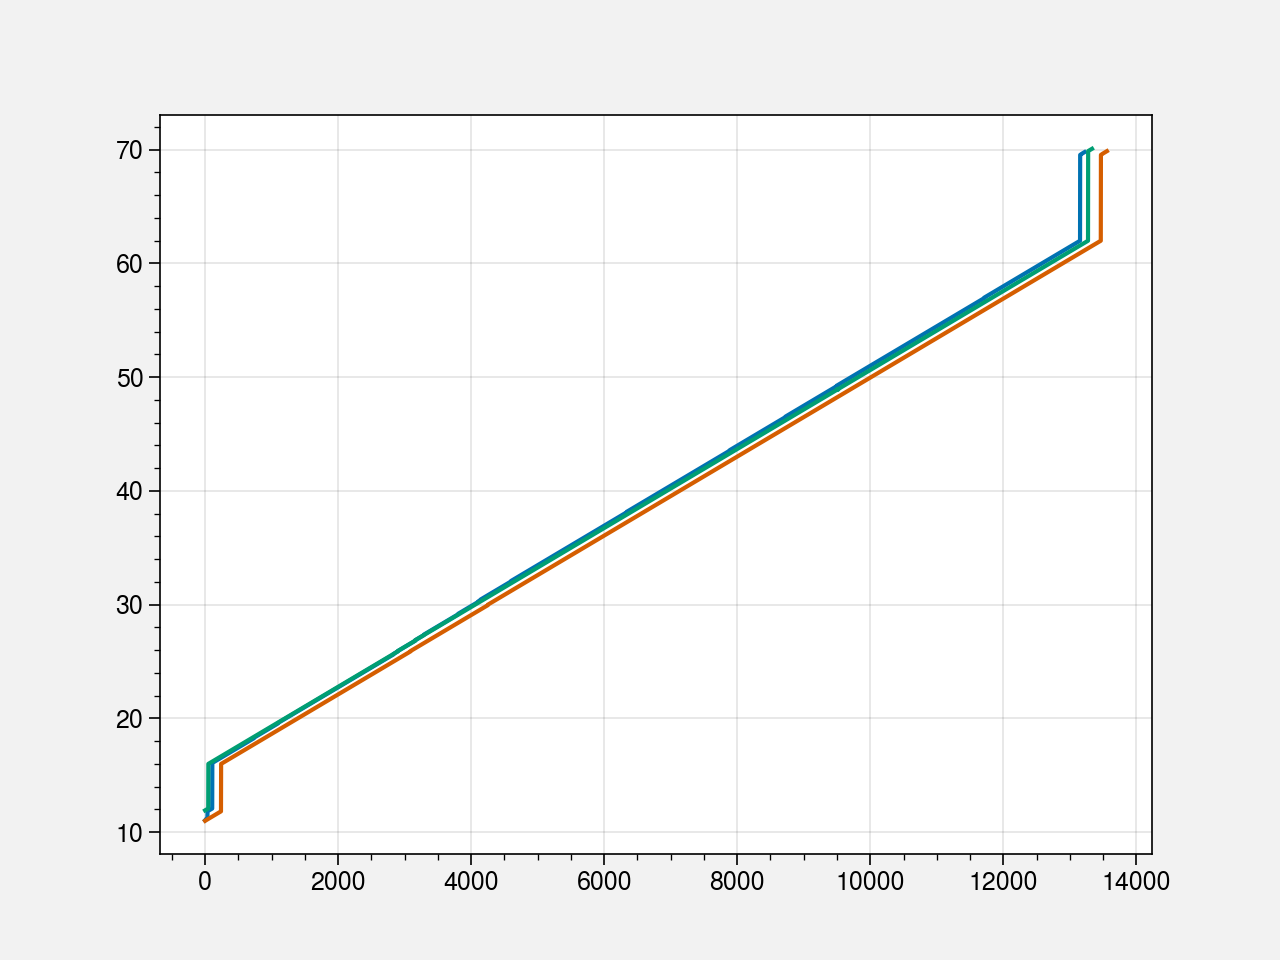

In [72]:
plt.plot(time26)
plt.plot(time60)
plt.plot(time61)

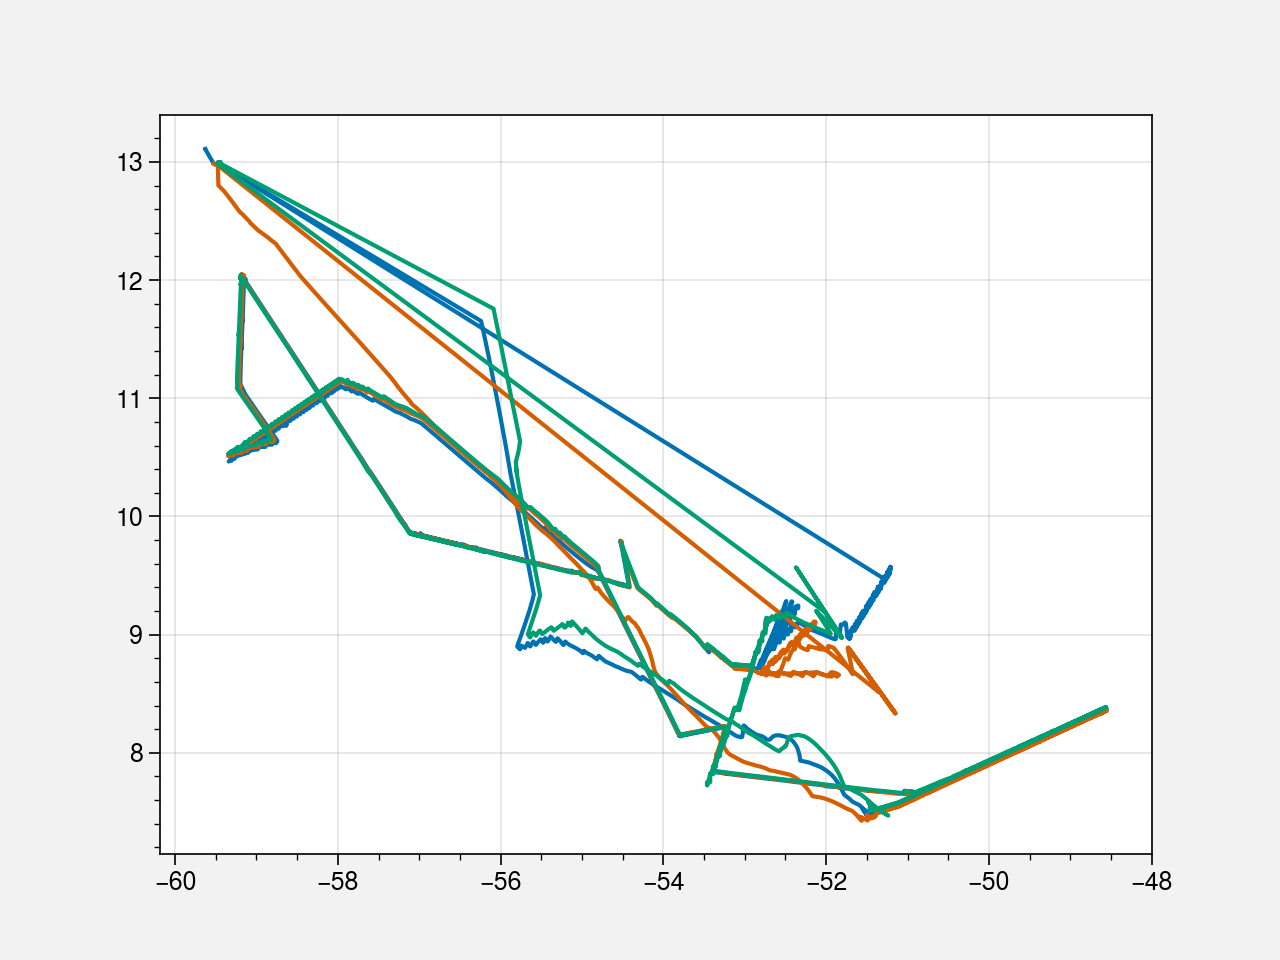

In [36]:
plt.plot(lon26,lat26)
plt.plot(lon60,lat60)
plt.plot(lon61,lat61)

In [76]:
velocitydata_all.sel(longitude=50)

ValueError: dimensions or multi-index levels ['longitude'] do not exist

In [72]:
velocitydata_all.sel?